<a href="https://colab.research.google.com/github/Intertangler/bioinformatics_stockholm/blob/master/4_phylogeny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance metrics
In this exercise, we will explore some aspects of hierarchy, a fundamental structure in nature that resides at the heart of computation, biology, and the realm where they overlap.

The first thing we should get an intuition for is the somewhat abstract notion of distance in the context of bioinformatics. Distance between sequences can be correlated with time, but it can also be influenced by other factors and is context dependent.


## Problem 4.1
Write a function that takes 2 sequences of equal length and which returns the Hamming distance between those sequences as its output. The Hamming distance is simply the number of mismatches between the two sequences, or the number of substitutions that you would need to perform to make the two sequences the same. Test your function on the following two protein sequences: each variants of the sars-cov-2 nucleocapsid phosphoprotein but taken at different timepoints in the pandemic. The first sequence is one of the earliest MN908947.3, and the second is from this year MW665756.1 **What is the Hamming distance between the two sequences?"**

seq1 = "ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAA"


seq2 = "ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCTCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCTAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATTAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAA"

Note however the brittleness of the Hamming distance. If we introduce a single nucleotide frame shift (keeping sequences equal length by deleting the first base and adding a base at the end), then we essentially get a Hamming distance equal to the length of the entire sequence. It is, in a sense, blind to sequence similarity in the absense of alignment.

Try the function below that computes the Levenshtein distance (also known as edit distance) instead. This, as the name implies, computes how many edits one needs to make to create two equal sequences beginning from two different sequences. Insertions and deletions are accounted for in this case unlike Hamming distance.

Sequences 2 and 3 in this case are from the sars-cov-2 spike protein at different time points in the pandemic. Compare the Levenshtein result with that of your Hamming function (just insert gaps at the end to make the sequences equal length to check).

In [5]:
import numpy as np

def levenshtein(seq1, seq2):
  # credit due to Frank Hofmann for this function
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    # print (matrix)
    return int(matrix[size_x - 1, size_y - 1])

In [ ]:
seq3 = "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT"
seq4 = "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAISGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNFREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSKNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAIEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT--"

print(levenshtein(seq3, seq4))
print(hamming(seq3, seq4))

7
1137


The tradeoff, of course, is computation time. Levenshtein distance is a far more demanding calculation than Hamming, so the number of sequences and their size will determine which approach works best.

# Distance matrices and trees
The following is a sample distance matrix between a hypothetical set of sequences. The idea is that every cell contains the Hamming or Levenshtein distance between sequences indicated by row and column. Run the cells below to let the scipy module perform hierarchical clustering using the distance matrix as input. The resulting tree gives us information about the hierarchical relationships between the sequences. The algorithm scipy uses for the hierarchical clustering is very similar to the UPGMA approach that we learned in lecture. 

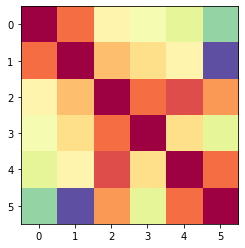

In [ ]:
import matplotlib.pyplot as plt

my_distance_matrix = np.array([[0,3,7,8,9,11],[3,0,5,6,7,15],[7,5,0,3,2,4],[8,6,3,0,6,9],[9,7,2,6,0,3],[11,15,4,9,3,0]])
my_labels = ["sequence a","sequence b","sequence c","sequence d","sequence e","sequence f"]
plt.imshow(my_distance_matrix, cmap="Spectral")

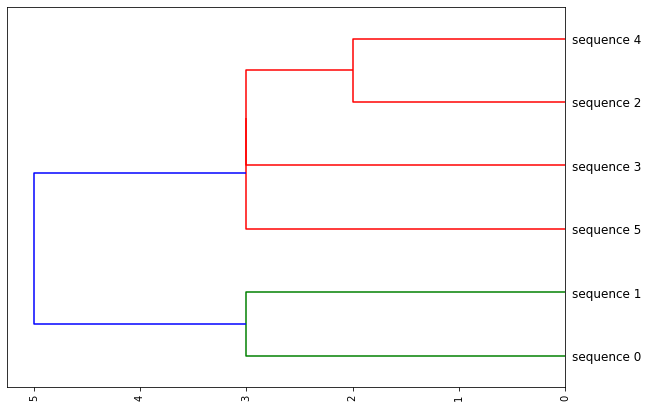

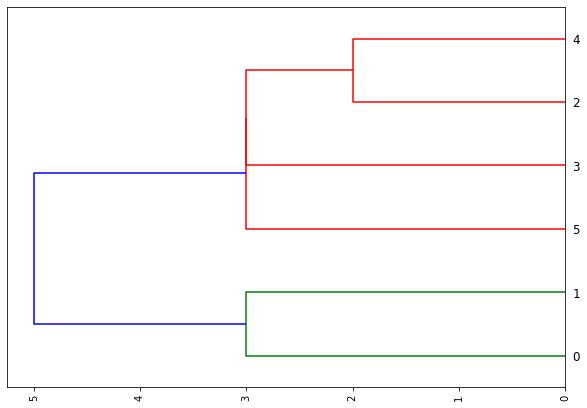

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial import distance


linked = linkage(distance.squareform(my_distance_matrix, force='no', checks=True), 'single')

# creates a tree with sequence labels
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='left',
            labels=my_labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

# creates a tree with node numbers as labels
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='left',
            labels=None,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

## Problem 4.2 
Make a distance matrix from the cas9 sequences that we explored in the previous exercise 3. Since the lengths of the sequences differ, use levenshtein distance as the distance metric. Then run the dendrogram block of code with your distance matrix substituted for the example one, and **determine visually which pair of sequences have the shortest evolutionary distance to CAS9_PASMU/504-659, CAS9A_STRTD/516-684 and CAS9_CORDI/504-665.**  


"CAS9_ACTNH/513-675": "GTTIGYHTCQLDHIVPQAGPGSNNRRGNLVAVCERCNRSKSNTPFAVWAQKCGIPGTTIGYHTCQLDHIVPQAGPGSNNRRGNLVAVCERCNRSKSNTPFAVWAQKCGIPHVGVKEAIGRVRGWRKQTPNTSSEDLTRLKKEVIARLRRTQEDPEIDERSM", "CAS9A_STRTD/516-684": "CLYTGKTISIHDLINNSNQFEVDHILPLSITFDDSLANKVLVYATANQEKGQRTPYQALDCLYTGKTISIHDLINNSNQFEVDHILPLSITFDDSLANKVLVYATANQEKGQRTPYQALDSMDDAWSFRELKAFVRESKTLSNKKKEYLLTEEDISKFDVRKKFIERNL", "CAS9B_STRTD/771-928": "LQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDVPSLLQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDVPSLEVVKKRKTFWYQLLKSKLISQRKFDNLTKAERGGLSPEDKAGFIQRQL", "CAS9_CAMJE/487-637": "KIKISDLQDEKMLEIDHIYPYSRSFDDSYMNKVLVFTKQNQEKLNQTPFEAFGNDSAKWKIKISDLQDEKMLEIDHIYPYSRSFDDSYMNKVLVFTKQNQEKLNQTPFEAFGNDSAKWQKIEVLAKNLPTKKQKRILDKNYKDKEQKNFKDRNL", "CAS9_CORDI/504-665": "GSPITFSNSEMDHIVPRAGQGSTNTRENLVAVCHRCNQSKGNTPFAIWAKNTSIEGSPITFSNSEMDHIVPRAGQGSTNTRENLVAVCHRCNQSKGNTPFAIWAKNTSIEGVSVKEAVERTRHWVTDTGMRSTDFKKFTKAVVERFQRATMDEEIDARSM", "CAS9_FRATN/897-1046": "NLTDGDFDGAKEELDHIIPRSHKKYGTLNDEANLICVTRGDNKNKGNRIFCLRDLADNYNLTDGDFDGAKEELDHIIPRSHKKYGTLNDEANLICVTRGDNKNKGNRIFCLRDLADNYKLKQFETTDDLEIEKKIADTIWDANKKDFKFGNY", "CAS9_LISIN/773-924": "MYTGQDLDIHNLSNYDIDHIVPQSFITDNSIDNLVLTSSAGNREKGDDVPPLEIVRKRMYTGQDLDIHNLSNYDIDHIVPQSFITDNSIDNLVLTSSAGNREKGDDVPPLEIVRKRKVFWEKLYQGNLMSKRKFDYLTKAERGGLTEADKARFIHRQL", "CAS9_NEIMA/512-667": "SGKEINLGRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLGSENQNKGNQTPYEYFNGKDNSGKEINLGRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLGSENQNKGNQTPYEYFNGKDNSREWQEFKARVETSRFPRSKKQRILLQKFDEDGFKERNL", "CAS9_PASMU/504-659": "SGKEINIHRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLASENQNKGNQTPYEWLQGKINSGKEINIHRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLASENQNKGNQTPYEWLQGKINSERWKNFVALVLGSQCSAAKKQRLLTQVIDDNKFIDRNL", "CAS9_STAAU/480-646": "LEAIPLEDLLNNPFNYEVDHIIPRSVSFDNSFNNKVLVKQEENSKKGNRTPFQYLSSSDSLEAIPLEDLLNNPFNYEVDHIIPRSVSFDNSFNNKVLVKQEENSKKGNRTPFQYLSSSDSKISYETFKKHILNLAKGKGRISKTKKEYLLEERDINRFSVQKDFINRNL", "CAS9_STRMU/770-921": "MYTGEELDIDYLSQYDIDHIIPQAFIKDNSIDNRVLTSSKENRGKSDDVPSKDVVRKMMYTGEELDIDYLSQYDIDHIIPQAFIKDNSIDNRVLTSSKENRGKSDDVPSKDVVRKMKSYWSKLLSAKLITQRKFDNLTKAERGGLTDDDKAGFIKRQL", "CAS9_STRP1/770-921": "MYVDQELDINRLSDYDVDHIVPQSFLKDDSIDNKVLTRSDKNRGKSDNVPSEEVVKKMMYVDQELDINRLSDYDVDHIVPQSFLKDDSIDNKVLTRSDKNRGKSDNVPSEEVVKKMKNYWRQLLNAKLITQRKFDNLTKAERGGLSELDKAGFIKRQL", "CAS9_STRTR/792-949": "LQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDFPSLLQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDFPSLEVVKKRKTFWYQLLKSKLISQRKFDNLTKAERGGLLPEDKAGFIQRQL"


In [ ]:
cas9_seqs = {"CAS9_ACTNH/513-675": "GTTIGYHTCQLDHIVPQAGPGSNNRRGNLVAVCERCNRSKSNTPFAVWAQKCGIPGTTIGYHTCQLDHIVPQAGPGSNNRRGNLVAVCERCNRSKSNTPFAVWAQKCGIPHVGVKEAIGRVRGWRKQTPNTSSEDLTRLKKEVIARLRRTQEDPEIDERSM",
"CAS9A_STRTD/516-684": "CLYTGKTISIHDLINNSNQFEVDHILPLSITFDDSLANKVLVYATANQEKGQRTPYQALDCLYTGKTISIHDLINNSNQFEVDHILPLSITFDDSLANKVLVYATANQEKGQRTPYQALDSMDDAWSFRELKAFVRESKTLSNKKKEYLLTEEDISKFDVRKKFIERNL",
"CAS9B_STRTD/771-928": "LQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDVPSLLQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDVPSLEVVKKRKTFWYQLLKSKLISQRKFDNLTKAERGGLSPEDKAGFIQRQL",
"CAS9_CAMJE/487-637": "KIKISDLQDEKMLEIDHIYPYSRSFDDSYMNKVLVFTKQNQEKLNQTPFEAFGNDSAKWKIKISDLQDEKMLEIDHIYPYSRSFDDSYMNKVLVFTKQNQEKLNQTPFEAFGNDSAKWQKIEVLAKNLPTKKQKRILDKNYKDKEQKNFKDRNL",
"CAS9_CORDI/504-665": "GSPITFSNSEMDHIVPRAGQGSTNTRENLVAVCHRCNQSKGNTPFAIWAKNTSIEGSPITFSNSEMDHIVPRAGQGSTNTRENLVAVCHRCNQSKGNTPFAIWAKNTSIEGVSVKEAVERTRHWVTDTGMRSTDFKKFTKAVVERFQRATMDEEIDARSM",
"CAS9_FRATN/897-1046": "NLTDGDFDGAKEELDHIIPRSHKKYGTLNDEANLICVTRGDNKNKGNRIFCLRDLADNYNLTDGDFDGAKEELDHIIPRSHKKYGTLNDEANLICVTRGDNKNKGNRIFCLRDLADNYKLKQFETTDDLEIEKKIADTIWDANKKDFKFGNY",
"CAS9_LISIN/773-924": "MYTGQDLDIHNLSNYDIDHIVPQSFITDNSIDNLVLTSSAGNREKGDDVPPLEIVRKRMYTGQDLDIHNLSNYDIDHIVPQSFITDNSIDNLVLTSSAGNREKGDDVPPLEIVRKRKVFWEKLYQGNLMSKRKFDYLTKAERGGLTEADKARFIHRQL",
"CAS9_NEIM8/512-667": "SGKEINLGRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLGSENQNKGNQTPYEYFNGKDNSGKEINLGRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLGSENQNKGNQTPYEYFNGKDNSREWQEFKARVETSRFPRSKKQRILLQKFDEDGFKERNL",
"CAS9_PASMU/504-659": "SGKEINIHRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLASENQNKGNQTPYEWLQGKINSGKEINIHRLNEKGYVEIDHALPFSRTWDDSFNNKVLVLASENQNKGNQTPYEWLQGKINSERWKNFVALVLGSQCSAAKKQRLLTQVIDDNKFIDRNL",
"CAS9_STAAU/480-646": "LEAIPLEDLLNNPFNYEVDHIIPRSVSFDNSFNNKVLVKQEENSKKGNRTPFQYLSSSDSLEAIPLEDLLNNPFNYEVDHIIPRSVSFDNSFNNKVLVKQEENSKKGNRTPFQYLSSSDSKISYETFKKHILNLAKGKGRISKTKKEYLLEERDINRFSVQKDFINRNL",
"CAS9_STRMU/770-921": "MYTGEELDIDYLSQYDIDHIIPQAFIKDNSIDNRVLTSSKENRGKSDDVPSKDVVRKMMYTGEELDIDYLSQYDIDHIIPQAFIKDNSIDNRVLTSSKENRGKSDDVPSKDVVRKMKSYWSKLLSAKLITQRKFDNLTKAERGGLTDDDKAGFIKRQL",
"CAS9_STRP1/770-921": "MYVDQELDINRLSDYDVDHIVPQSFLKDDSIDNKVLTRSDKNRGKSDNVPSEEVVKKMMYVDQELDINRLSDYDVDHIVPQSFLKDDSIDNKVLTRSDKNRGKSDNVPSEEVVKKMKNYWRQLLNAKLITQRKFDNLTKAERGGLSELDKAGFIKRQL",
"CAS9_STRTR/792-949": "LQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDFPSLLQNGKDMYTGDDLDIDRLSNYDIDHIIPQAFLKDNSIDNKVLVSSASNRGKSDDFPSLEVVKKRKTFWYQLLKSKLISQRKFDNLTKAERGGLLPEDKAGFIQRQL"
}
cas9keys = list(cas9_seqs.keys())
cas9vals = list(cas9_seqs.values())

#### make your distance matrix below and call it distance_matrix ####

In [ ]:
# distance_matrix = 

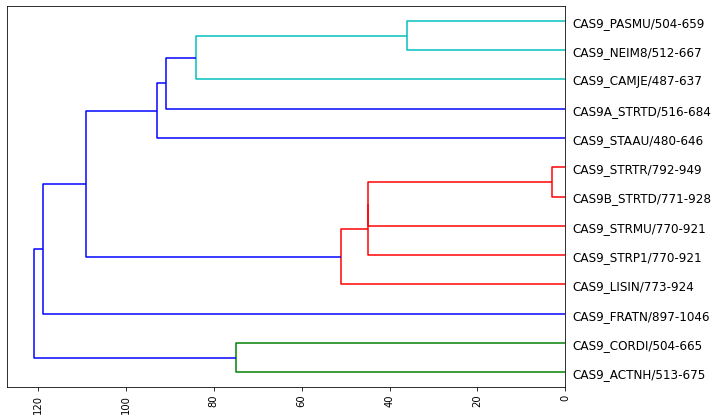

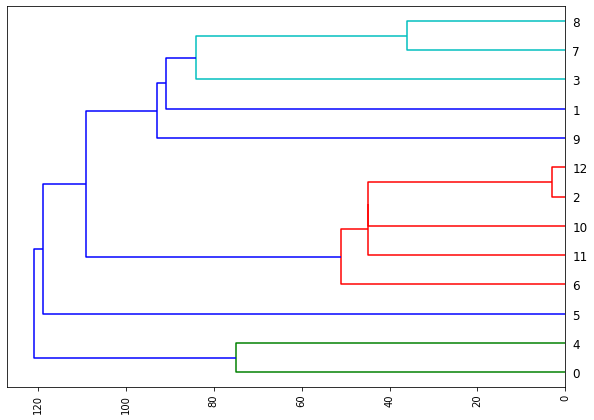

In [ ]:
#### make your distance matrix above and call it distance_matrix, then run the code in this cell####
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial import distance

linked = linkage(distance.squareform(distance_matrix, force='no', checks=True), 'single') # converts the matrix to a tree

labelList = cas9keys

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

linked = linkage(distance.squareform(distance_matrix, force='no', checks=True), 'single')# converts the matrix to a tree

labelList = None

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=90)
plt.show()

# Modeling evolution
In this next section, we will get you to think about a model of evolution as a stochastic process.

Consider the two PSSM's shown below. Their values represent order-of-magnitude odds of a given substitution occurring relative to the overall mutation rate. Since the substitution probabilities differ by column, different positions will be more or less likely to favor different amino acids.

One way to think of a PSSM is a quantification of selective pressure for particular amino acids according to position. The rows correspond to amino acids in this order: ARNDCQEGHILKMFPSTWYV

The columns correspond to positions in a protein or peptide. We can imagine that the information could have been derived from orthologs - proteins from different species with the same function. Thus the data gives us information about the evolutionary constraints surrounding of the protein if it is to maintain its function.

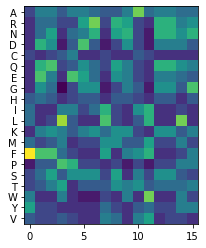

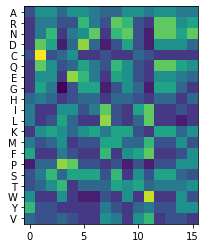

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
aas = list("ARNDCQEGHILKMFPSTWYV") # list of all aa's

matrix_1 = np.array([
[-3,0,0,-2,0,0,-1,-2,-2,0,5,-1,0,0,-1,-1],
[-4,-1,-1,-3,-3,2,5,-3,3,2,-3,-4,3,3,0,1],
[-4,-1,2,-4,-1,0,3,-4,2,3,-3,-5,3,3,1,3],
[-4,3,1,-5,-2,4,-2,-5,-3,1,-3,-5,0,0,0,-2],
[-3,-4,-3,-2,0,-4,-4,-3,-4,-4,-2,-3,-4,-4,-4,-4],
[-4,3,4,-3,-2,1,-1,-3,2,0,-3,-4,3,3,1,0],
[-4,4,0,-4,4,2,-1,-4,1,0,-3,-4,0,0,-1,-2],
[-4,1,-1,-6,-3,1,1,-5,-3,0,-2,-5,1,1,-2,4],
[-2,-1,-2,-4,-3,-2,-2,-4,-2,-2,-3,-4,-2,-2,-4,-2],
[-1,-4,-4,0,0,-3,-1,3,-3,-4,1,3,-4,-4,-3,-4],
[-1,-4,-3,6,-2,-4,-4,4,-3,-4,-2,3,-4,-4,5,-4],
[-4,0,1,0,-2,0,1,-1,1,1,-3,-4,1,1,-2,0],
[-1,-3,-2,0,-4,-3,-3,1,1,-2,-2,2,-3,-3,0,-3],
[8,4,4,-1,-3,-4,-4,2,-4,0,1,3,-4,-4,-3,0],
[-5,-2,-2,4,3,-3,-3,-4,-3,-5,-3,-5,-3,-3,0,0],
[-3,-1,2,-2,1,1,1,-3,2,-4,0,-3,1,1,-2,-3],
[-3,-2,0,2,-4,-2,-2,-2,1,0,1,-2,-1,-1,-1,0],
[0,-4,-4,0,-4,-5,-5,-3,-4,0,-4,5,-4,-4,0,-3],
[2,-3,-3,-4,-4,-4,-4,-1,-3,-4,-2,-1,-3,-3,0,0],
[-2,-3,-3,-2,-3,-4,-4,0,-1,-4,0,2,-4,-3,-3,-4]
])

plt.imshow(matrix_1)
plt.yticks(range(0,len(aas)), "ARNDCQEGHILKMFPSTWYV")
plt.show()

matrix_2 = np.array([
[-3,0,0,-2,0,0,-1,-2,-2,0,0,-1,0,0,-1,-1],
[-4,-1,-1,-3,-3,2,-1,-3,3,2,-3,-4,3,3,0,1],
[-4,-1,2,-4,-1,0,3,-4,2,3,-3,-5,3,3,1,3],
[-4,3,1,-5,-2,4,-2,-5,-3,1,-3,-5,0,0,0,-2],
[-3,6,-3,-2,0,-4,-4,-3,-4,-4,-2,-3,-4,-4,-4,-4],
[-4,3,0,-3,-2,1,-1,-3,2,0,-3,-4,3,3,1,0],
[-4,0,0,-4,4,2,-1,-4,1,0,-3,-4,0,0,-1,-2],
[-4,1,-1,-6,-3,1,1,-5,-3,0,-2,-5,1,1,-2,-4],
[-2,-1,-2,-4,-3,-2,-2,-4,-2,-2,-3,-4,-2,-2,-4,-2],
[-1,-4,-4,0,0,-3,-1,3,-3,-4,1,3,-4,-4,-3,-4],
[-1,-4,-3,1,-2,-4,-4,4,-3,-4,-2,3,-4,-4,-5,-4],
[-4,0,1,0,-2,0,1,-1,1,1,-3,-4,1,1,-2,0],
[-1,-3,-2,0,-4,-3,-3,1,1,-2,-2,2,-3,-3,0,-3],
[1,-4,-4,-1,-3,-4,-4,2,-4,0,1,3,-4,-4,-3,0],
[-5,-2,-2,4,3,-3,-3,-4,-3,-5,-3,-5,-3,-3,0,0],
[-3,-1,2,-2,1,1,1,-3,2,-4,0,-3,1,1,-2,-3],
[-3,-2,0,2,-4,-2,-2,-2,1,0,1,-2,-1,-1,-1,0],
[0,-4,-4,0,-4,-5,-5,-3,-4,0,-4,5,-4,-4,0,-3],
[2,-3,-3,-4,-4,-4,-4,-1,-3,-4,-2,-1,-3,-3,0,0],
[-2,-3,-3,-2,-3,-4,-4,0,-1,-4,0,2,-4,-3,-3,-4]
])

plt.imshow(matrix_2)
plt.yticks(range(0,len(aas)), "ARNDCQEGHILKMFPSTWYV")
plt.show()


Below we have set up a small simulation of evolution. Rather than look at all members of a family, this simulation is focused on a single peptide's **lineage**. In a lineage, every member is directly descendent from the previous one. It is a continuous line of descent. 

The simulation takes as its initial parameters a base mutation rate, the number of generations to be simulated, an initial sequence, and a PSSM which is used to determine the mutation probabilities. Note that the peptide sequence and PSSM must be of same length. The output is an array called timeline, which contains the computed levenshtein distances of every generation with that of the original (oldest ancestor). Have a look at the graph produced - what could this tell us, for example if the trajectory changes a lot from the beginning. What does it mean if the trajectory seems relatively flat (with just noise or fluctuation)? 

['FEQLEDRLRRIWQRLG', 'FFFPPERISNAFQNLG', 'FFFPPERISRTFQNLG', 'YFFPPDNISNAWQNLG', 'YFFPPRRISNTWQNLG', 'FFQLEDRLRRIWQRLG', 'FFQLEDRLSRAIQRDN', 'FFQLPERISRTIQNDG', 'FFFPPDRISNAWQNLG', 'YEFLPRRISNTWQRLG', 'YFFLPDRISNAFQNQG', 'FFFLPDNISRAFQNQG', 'YEQLEDNISNAWQRLG', 'FFFPPDNISRAFQNLG', 'YFFPPDRISNTWQNLG', 'FEQLEDRLSRIWQRDN', 'FFQLPERISRTIQNDN', 'YFFPPDRISNAWQNLG', 'FFQLEDRLSRTIQRDN', 'YEQLERRISNAWQRLG', 'FFFPPERISRAFQNLG', 'FFFPPDRIRNAWQNLG', 'FFQLPERISRTWQNDG', 'YEFLPRRISNAWQRLG', 'YEQLEDNISNTWQRNG', 'FFQPEERISRTFQNLG', 'FFQLEDRLSRIIQRDN', 'YEQLPRRISNAWQRLG', 'FFFPEERISRTFQNLG', 'FFQLPDRISRTIQRDN', 'FFQPEERISRTWQNDG', 'YFFPPDNISNAWQNLN', 'FFFLPDRISNAFQNQG', 'FEQLEDRLRNIWQRLG', 'FEQLEDRLRNIWRRLG', 'FEFPPDRISNAWQNLG', 'FEQLEDRLRNILRRLG', 'YFFPPDRIRNAWQNLG', 'YEQLEQNISNTWQRNG', 'FEQLEDRLSNAWRRLG', 'FFFLPDNISNAFQNQG', 'FFFPPERISRAFQNNG', 'FFFPPDRISRAFQNLG', 'FFFPPDNISNAWQNLG', 'YFFLPDRISRAFQNLG', 'FFFPPDNISRAWQNLG', 'YEQLEDRISNAWQRLG', 'YFFLPDRISNAFQNLG', 'FFQLPDRISRTIQNDN', 'FFFPPDRISNAFQNLG',

Text(0.5, 0, 'generations')

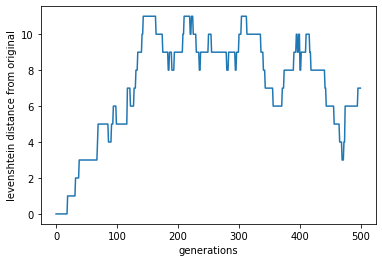

In [8]:
# simulation parameters:
generations = 500
average_mutations_per_gen = 0.01
original_sequence = "FEQLEDRLSNAWRRLG"
pssm = matrix_1


import random
# initialization
aas = list("ARNDCQEGHILKMFPSTWYV") # list of all aa's
timeline = np.zeros(generations)
current_gen_seq = list(original_sequence)
lineage_seqs = []

# main loop - an iteration for each generation
for i in range(0,generations):
  convert_seq_to_string = ''.join(current_gen_seq)
  lineage_seqs += [convert_seq_to_string]
  timeline[i] = levenshtein(original_sequence, convert_seq_to_string) #compute sequence distance relative to starting ancestor
  
  # peptide loop - go through each position in the protein sequence
  for pos in range(0, len(current_gen_seq)):
    if random.random() < average_mutations_per_gen:# determine whether or not to introduce a mutation according to the base mutation rate
      scores_to_probabilities = [10**float(i) for i in pssm[:,pos]]
      row_to_delete = np.where(np.array(aas) == current_gen_seq[pos])[0][0]
      scores_to_probabilities[row_to_delete] = 0
      proposed_substitution = random.choices(aas, weights = scores_to_probabilities/np.sum(scores_to_probabilities))[0] # PSSM decides which subst. to try
      if proposed_substitution != current_gen_seq[pos]:
        current_gen_seq[pos] = proposed_substitution
  
unique_sequences = list(set(lineage_seqs)) # fetches the list of distinct sequences (smaller than the number of generations)
print(unique_sequences)

import matplotlib.pyplot as plt
plt.plot(timeline)
plt.ylabel("levenshtein distance from original")
plt.xlabel("generations")

## Problem 4.3
**Using the PSSM called matrix_2, determine the average levenshtein distance of the peptide relative to the first sequence (its oldest ancestor) after it has reached a stable equilibrium. Give your answer within a margin of error of 1.** As with any simulation based on random number generation, larger numbers of experiments make the result more clear. 

# Optional challenge problem
Go to either NCBI or nextstrain.org and choose 5-10 DNA sequences derived from different timepoints of the coronavirus pandemic. Construct a phylogenetic tree using your choice of hierarchical clustering methods. You may want to focus on a particular gene, for example the spike protein, and it will most likely be easier to track differences in DNA sequence than protein.